# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     1387.
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           4.30e-45
Time:                        13:58:28   Log-Likelihood:                 11.801
No. Observations:                  50   AIC:                            -15.60
Df Residuals:                      46   BIC:                            -7.954
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0013      0.068     73.648      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.46247807  4.91789328  5.33921539  5.70395387  5.9977349   6.21666297
  6.36796086  6.468783    6.54339699  6.61919658  6.72220087  6.87277952
  7.08230601  7.35128905  7.669289    8.01663304  8.36764739  8.69487544
  8.97358876  9.18584996  9.3234597   9.38930386  9.39687939  9.36807678
  9.32958353  9.30849946  9.3278843   9.40296904  9.53865349  9.72870132
  9.95676459 10.19906974 10.42832347 10.618197   10.74765177 10.80439602
 10.78690432 10.70466818 10.57663661 10.42810287 10.28654884 10.17712984
 10.11854168 10.11994897 10.17947945 10.28453154 10.41384477 10.54099283
 10.63872532 10.6834449 ]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.64325958 10.49158089 10.24459247  9.93917475  9.62387534  9.34702292
  9.14489465  9.03283427  9.00149543  9.01912998]


## Plot comparison

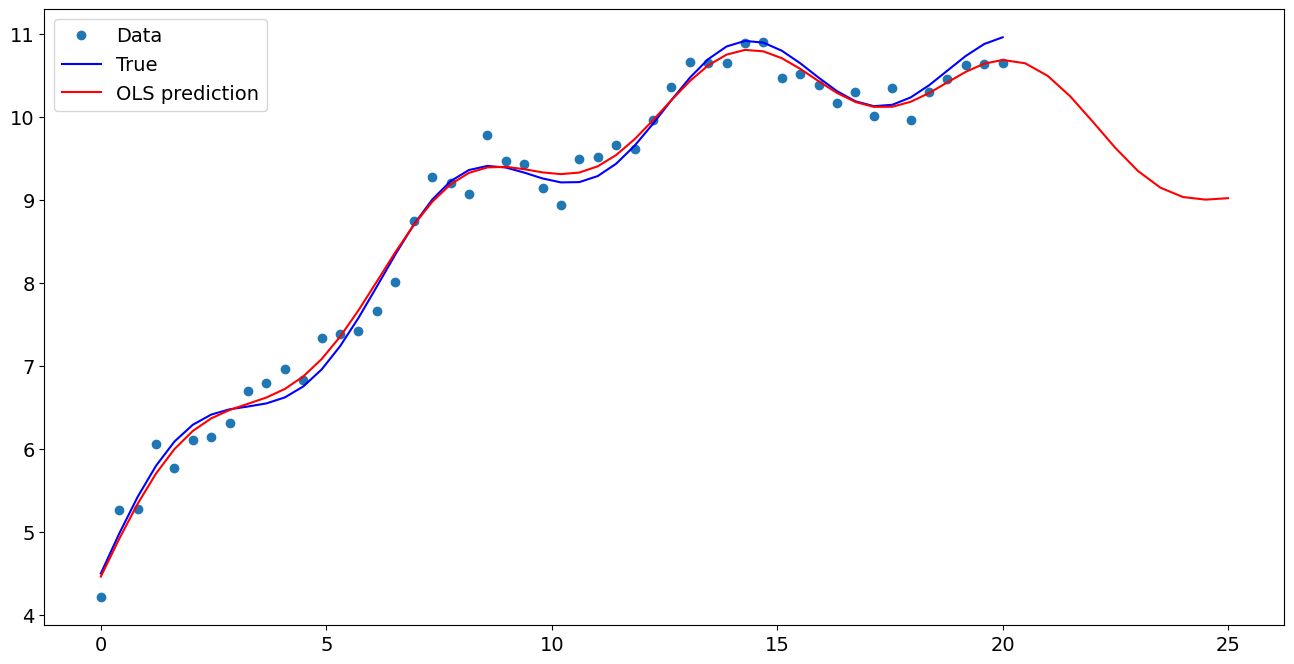

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.001278
x1                  0.507731
np.sin(x1)          0.412677
I((x1 - 5) ** 2)   -0.021552
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.643260
1    10.491581
2    10.244592
3     9.939175
4     9.623875
5     9.347023
6     9.144895
7     9.032834
8     9.001495
9     9.019130
dtype: float64